In [1]:
from google.colab import files
uploaded = files.upload()


Saving banknote+authentication.zip to banknote+authentication.zip


In [2]:
import zipfile
import os

with zipfile.ZipFile('banknote+authentication.zip', 'r') as zip_ref:
    zip_ref.extractall()

os.listdir()


['.config',
 'banknote+authentication.zip',
 'data_banknote_authentication.txt',
 'sample_data']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [4]:
columns = ['variance', 'skewness', 'kurtosis', 'entropy', 'auth']

data = pd.read_csv(
    'data_banknote_authentication.txt',
    names=columns
)

data.head()
data.info()
data['auth'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   auth      1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


,count
auth,
0,762
1,610


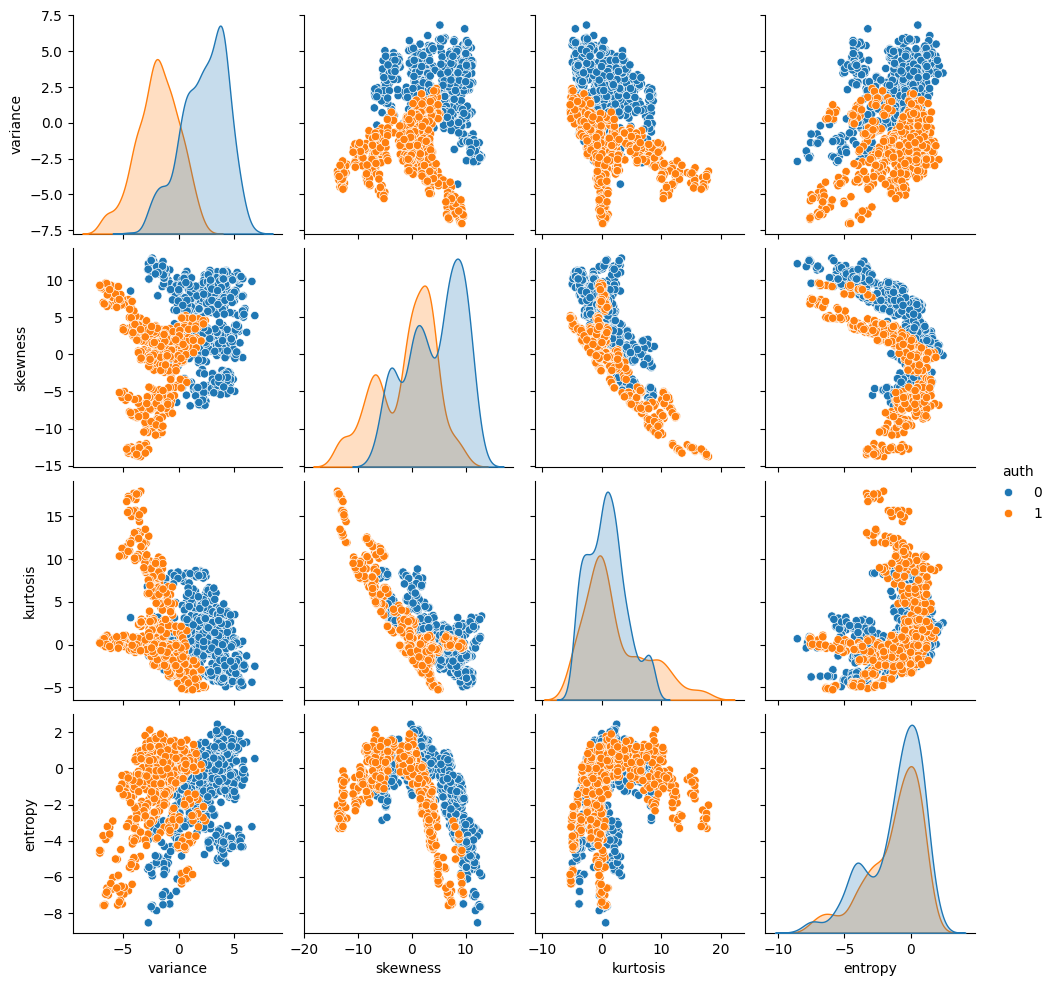

In [5]:
sns.pairplot(data, hue='auth')
plt.show()


In [6]:
X = data.drop('auth', axis=1)
y = data['auth']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9781818181818182
Confusion Matrix:
 [[144   4]
 [  2 125]]


In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9927272727272727


In [10]:
sample = pd.DataFrame(
    [[3.6216, 8.6661, -2.8073, -0.44699]],
    columns=['variance', 'skewness', 'kurtosis', 'entropy']
)

sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)

print("Prediction (0 = Real, 1 = Fake):", prediction[0])


Prediction (0 = Real, 1 = Fake): 0


In [12]:
sample = pd.DataFrame(
    [[-5, -10, 15, 5]],
    columns=['variance', 'skewness', 'kurtosis', 'entropy']
)

sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)

print("Prediction (0 = Real, 1 = Fake):", prediction[0])


Prediction (0 = Real, 1 = Fake): 1
